# Infections Comparison

This script was written to provide easy interpretation of infection statistics for four locations. It has been initialised to load the data available [here](https://lginform.local.gov.uk/reports/view/lga-research/covid-19-case-tracker) The link allows an excel file to be downloaded. Several rows at the beginning of the excel file have been removed for ease of use as have any of the irrelevant columns (cumulative cases, deaths etc.).

I make no claim that this script is overly efficient, it was made for personal interest.

Any questions please contact:
> Andrew Paul Barnes<br>
> Doctoral Student & Teaching Assistant<br>
> Department of Architecture and Civil Engineering<br>
> University of Bath<br>
> a.p.barnes@bath.ac.uk

## Libraries

To begin several libraries are imported to allow easy manipulation of the data.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import linregress
from matplotlib.lines import Line2D

## Loading Data Required

First the areas of interest are defined in the variable *AREAS* and the file name/location are given in *MASTER_FILE*.

*MANUAL* Unfortunately due to the dataset containing

In [39]:
AREAS = ["Swindon", "Northampton", "Wiltshire", "Cheltenham"]
MASTER_FILE = "lainfections.csv"

Next, the infections data are loaded.

In [61]:
# Load data
weekly_infections = pd.read_csv(MASTER_FILE, delimiter=',')

# Filter to only contain the areas of interest
weekly_infections = weekly_infections.loc[weekly_infections['area'].isin(AREAS)]

# Dates extraction
dates = weekly_infections.columns.to_list()[2:]

# Split into areas
area_infections = {}
for a in AREAS:
    area_infections[a] = weekly_infections.loc[weekly_infections['area'] == a].iloc[:, 2:].to_numpy()[0].astype(int)

## Daily Infections Comparison

This first analysis section will take the daily total infections of each area and generate a graph showing how these vary in each chosen area.

ValueError: x and y must have same first dimension, but have shapes (30,) and (29,)

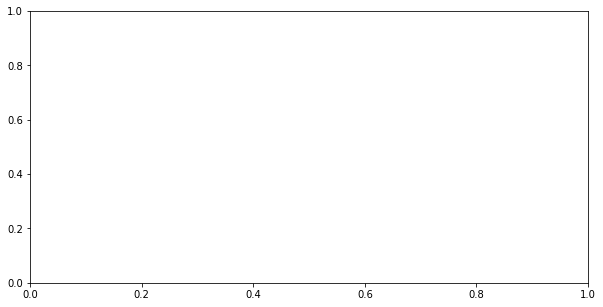

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

linetypes = ["-", ":", "-.", "--"]

ticks = [0, len(dates)]
labels = [dates[0], dates[-1]]

for idx, area in enumerate(AREAS):
    axs.plot(range(0, len(dates)), area_infections[area], ls=linetypes[idx], c='k', label=area)

axs.set_xticks(ticks)
axs.set_xticklabels(labels)
axs.set_xlim([0, len(dates)])
axs.set_ylim([0, 100])
axs.set_xlabel("Day", fontsize=14)
axs.set_ylabel("No. Infections", fontsize=14)
axs.legend(fontsize=12)
axs.set_title("COVID-19 Infections", fontsize=16)